<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal:" data-toc-modified-id="Goal:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal:</a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary" data-toc-modified-id="Data-Dictionary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Dictionary</a></span></li></ul></li><li><span><a href="#Programming-Environment" data-toc-modified-id="Programming-Environment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Programming Environment</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#EDA-&amp;-Data-Preprocessing" data-toc-modified-id="EDA-&amp;-Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA &amp; Data Preprocessing</a></span></li><li><span><a href="#Modeling-and-model-evaluation" data-toc-modified-id="Modeling-and-model-evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling and model evaluation</a></span><ul class="toc-item"><li><span><a href="#v1:-Logistic-Regression-with-Class-Weight" data-toc-modified-id="v1:-Logistic-Regression-with-Class-Weight-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>v1: Logistic Regression with Class Weight</a></span></li><li><span><a href="#v2:-Logistic-Regression-with-cross-validation" data-toc-modified-id="v2:-Logistic-Regression-with-cross-validation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>v2: Logistic Regression with cross validation</a></span></li><li><span><a href="#v3:-Logistic-Regression-with-SMOTE" data-toc-modified-id="v3:-Logistic-Regression-with-SMOTE-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>v3: Logistic Regression with SMOTE</a></span></li><li><span><a href="#v4:-Random-Forest" data-toc-modified-id="v4:-Random-Forest-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>v4: Random Forest</a></span></li><li><span><a href="#v5:-Random-Forest-with-hyperparameter-tuning" data-toc-modified-id="v5:-Random-Forest-with-hyperparameter-tuning-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>v5: Random Forest with hyperparameter tuning</a></span></li></ul></li><li><span><a href="#Extra" data-toc-modified-id="Extra-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra</a></span><ul class="toc-item"><li><span><a href="#Logistic-regressio-with-weights" data-toc-modified-id="Logistic-regressio-with-weights-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic regressio with weights</a></span></li><li><span><a href="#Use-grid-search-to-find-optimal-weight" data-toc-modified-id="Use-grid-search-to-find-optimal-weight-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Use grid search to find optimal weight</a></span></li><li><span><a href="#train/test-size-selection" data-toc-modified-id="train/test-size-selection-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>train/test size selection</a></span></li></ul></li></ul></div>

## Goal:

Build a model to predict the likelihood of default, a model which can generalize to
other data points.

### Data Dictionary

The column to be predicted is `default payment next month`.

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Programming Environment

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
plt.rc("font", size=14)

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, cross_validate
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Useful Functions

In [2]:
#Function to check the distribution of any given column with respect to default_payment_next_month

def get_aggregate_table(df, col):
    df_grp = df.groupby([col, 'default_payment_next_month']).agg({'default_payment_next_month': 'count'}).rename(columns = {'default_payment_next_month': 'count_default'})
    df_grp.reset_index(inplace = True)
    df_grp_pivot = df_grp.pivot(index = col, columns = 'default_payment_next_month', values = 'count_default')
    df_grp_pivot["def/no_def"] = df_grp_pivot[1]/df_grp_pivot[0]
    df_grp_pivot['total_count'] = df_grp_pivot[1]+df_grp_pivot[0]
    return df_grp_pivot
    

In [3]:
#Function to create roc curve
def roc_curve_data(y_test, X_test, model, model_name):
    roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= model_name+' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

## EDA & Data Preprocessing

Steps:

- Check missing values
- Check duplicates
- Check outliers
- Remove redundant data
- Check for imbalance in target column (default_payment_next_month)
- Slice data by few variables to check the default pattern
- Graphs - to check patterns

In [4]:
df = pd.read_excel (r'default of credit card clients.xls', index_col=None, skiprows=1)
df.set_index('ID', inplace = True)
df.rename(columns={'default payment next month': 'default_payment_next_month'}, inplace=True)
df.columns = [col.lower() for col in df.columns]
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_bal                   30000 non-null  int64
 1   sex                         30000 non-null  int64
 2   education                   30000 non-null  int64
 3   marriage                    30000 non-null  int64
 4   age                         30000 non-null  int64
 5   pay_0                       30000 non-null  int64
 6   pay_2                       30000 non-null  int64
 7   pay_3                       30000 non-null  int64
 8   pay_4                       30000 non-null  int64
 9   pay_5                       30000 non-null  int64
 10  pay_6                       30000 non-null  int64
 11  bill_amt1                   30000 non-null  int64
 12  bill_amt2                   30000 non-null  int64
 13  bill_amt3                   30000 non-null  int64
 14  bill_a

In [6]:
#Checking for missing values
df.isna().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default_payment_next_month    0
dtype: int64

In [7]:
df.describe()
#A negative balance indicates that your bill was overpaid and that person may be eligible for a refund.
#in general range of BILL_AMT6 is pretty high

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#Checking for duplicates
df.duplicated().sum()

35

In [9]:
#find duplicated rows
df[df.duplicated(keep=False)]

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,,,,
19,360000,2,1,1,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
628,230000,1,1,1,39,-1,-1,-1,-1,-1,-1,660,660,660,660,660,660,660,660,660,660,660,660,0
840,500000,1,1,1,43,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
1094,360000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
1212,160000,2,3,2,26,-1,-1,-1,-1,-1,-1,390,390,390,390,390,390,390,390,390,390,390,390,0
1602,150000,2,1,1,31,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
1760,50000,1,2,2,26,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
1965,150000,2,1,1,38,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
1981,150000,2,1,1,38,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
#keep only first occurence of duplicate rows
no_dup_df = df.drop_duplicates(keep='first')

In [11]:
#imbalance in target values
no_dup_df['default_payment_next_month'].value_counts(normalize = True)*100

0    77.874187
1    22.125813
Name: default_payment_next_month, dtype: float64

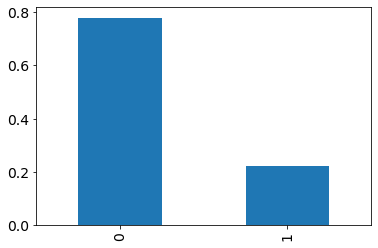

In [12]:
no_dup_df['default_payment_next_month'].value_counts(normalize = True).plot(kind = 'bar')

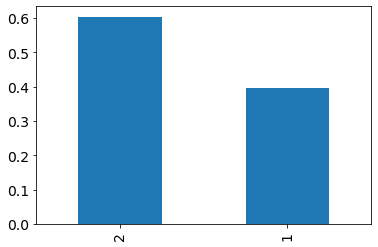

In [13]:
#Gender (1 = male; 2 = female)
no_dup_df['sex'].value_counts(normalize = True).plot(kind = 'bar')

In [14]:
get_aggregate_table(no_dup_df, 'sex')

default_payment_next_month,0,1,def/no_def,total_count
sex,,,,
1,9005,2869,0.318601,11874
2,14330,3761,0.262456,18091


In [15]:
#Around 82% of the customers are either in graduate school or in university
no_dup_df['education'].value_counts(normalize = True)*100

2    46.784582
1    35.251126
3    16.402470
5     0.934423
4     0.410479
6     0.170199
0     0.046721
Name: education, dtype: float64

In [16]:
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
#Not sure why dataset has Education value 0, 5,6. As their percentage is small, I am dropping these rows

edu_list = [0, 5, 6]
no_dup_df.drop(no_dup_df.loc[no_dup_df['education'].isin(edu_list)].index, inplace=True)

In [17]:
no_dup_df['education'].value_counts(normalize = True)*100

2    47.329507
1    35.661715
3    16.593518
4     0.415260
Name: education, dtype: float64

In [18]:
#default ratio is higher in high school education and dataset has high number of customers with university education
get_aggregate_table(no_dup_df, 'education')

default_payment_next_month,0,1,def/no_def,total_count
education,,,,
1,8531,2032,0.238190,10563
2,10691,3328,0.311290,14019
3,3678,1237,0.336324,4915
4,116,7,0.060345,123


In [19]:
no_dup_df.groupby("education").mean()

,limit_bal,sex,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
education,,,,,,,,,,,,,,,,,,,,,,,
1,212903.531194,1.588564,1.652466,34.233456,-0.235160,-0.404904,-0.422702,-0.458866,-0.476001,-0.482912,48927.065796,47317.383887,45876.978131,43020.417022,40472.948405,38748.549181,6794.994036,7321.777525,6574.187257,5816.592540,5788.530815,6435.868882,0.192370
2,147060.132677,1.617091,1.523076,34.723375,0.102575,0.023682,-0.017548,-0.082103,-0.140524,-0.169984,53647.346672,51399.661816,48700.095442,44783.642985,41620.949854,40463.419859,5084.318496,5110.587132,4560.244311,4378.689279,4456.041301,4720.056637,0.237392
3,126552.935910,1.595117,1.421160,40.302543,0.133469,0.041506,0.003255,-0.065921,-0.138759,-0.183113,47582.821160,45538.743438,43458.514140,38734.258189,35972.021770,34718.639878,4868.298271,5055.431129,3965.590437,3994.203866,3601.044354,3827.226450,0.251679
4,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,-0.813008,-0.780488,-0.739837,54631.902439,47308.967480,44983.804878,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480,0.056911


In [20]:
no_dup_df["marriage"].value_counts(normalize = True)*100

2    53.298447
1    45.445645
3     1.073599
0     0.182309
Name: marriage, dtype: float64

In [21]:
# Dropping marriage category 0
no_dup_df.drop(no_dup_df.loc[no_dup_df['marriage']== 0].index, inplace=True)
no_dup_df.shape

(29566, 24)

In [22]:
get_aggregate_table(no_dup_df, 'marriage')

default_payment_next_month,0,1,def/no_def,total_count
marriage,,,,
1,10274,3187,0.310201,13461
2,12459,3328,0.267116,15787
3,234,84,0.358974,318


In [23]:
no_dup_df['default_payment_next_month'].value_counts(normalize = True)*100

0    77.680444
1    22.319556
Name: default_payment_next_month, dtype: float64

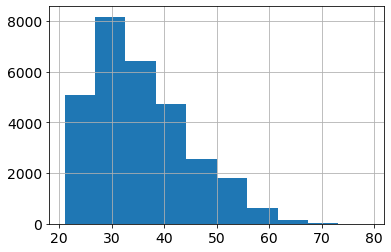

In [24]:
no_dup_df.age.hist()

Converting education, gender and marriage columns in dummy variable

In [25]:
data_final = no_dup_df.loc[:, no_dup_df.columns != 'education'].join(pd.get_dummies(no_dup_df['education'].mask(no_dup_df['education']==4), prefix= "education"))
data_final.head()

,limit_bal,sex,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,education_1.0,education_2.0,education_3.0
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0
2,120000,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0
3,90000,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0
4,50000,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0
5,50000,1,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0


In [26]:
data_final = data_final.loc[:, data_final.columns != 'sex'].join(pd.get_dummies(data_final['sex'].mask(data_final['sex']== 2), prefix= "gender"))
data_final.head()

,limit_bal,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,education_1.0,education_2.0,education_3.0,gender_1.0
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0
4,50000,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,1


In [27]:
data_final = data_final.loc[:, data_final.columns != 'marriage'].join(pd.get_dummies(data_final['marriage'].mask(data_final['marriage']== 3), prefix= "marriage"))
data_final.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,education_1.0,education_2.0,education_3.0,gender_1.0,marriage_1.0,marriage_2.0
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,1,1,0


In [28]:
data_final.shape

(29566, 27)

## Modeling and model evaluation

In [29]:
X = data_final.loc[:, data_final.columns != 'default_payment_next_month']
y = data_final.loc[:, data_final.columns == 'default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### v1: Logistic Regression with Class Weight

In [30]:
# Best model with highest area under the ROC curve
clf_wt = LogisticRegression(solver='liblinear', class_weight = 'balanced')
clf_wt.fit(X_train, y_train)

y_pred = clf_wt.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf_wt.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#for minority class
#detect 1337 correct out of 1337 + 667

Accuracy of logistic regression classifier on test set: 0.67
[[4632 2234]
 [ 667 1337]]


              precision    recall  f1-score   support

           0       0.87      0.67      0.76      6866
           1       0.37      0.67      0.48      2004

    accuracy                           0.67      8870
   macro avg       0.62      0.67      0.62      8870
weighted avg       0.76      0.67      0.70      8870



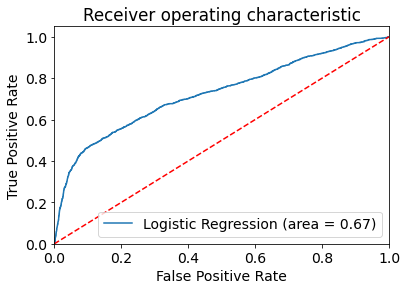

In [31]:
print(classification_report(y_test, y_pred))
roc_curve_data(y_test, X_test, clf_wt, 'Logistic Regression')

In [32]:
#The returned estimates for all classes are ordered by the label of classes.
#In the matrix below, each row corresponds to a single observation. 
#The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
#The second column is the probability that the output is one, or 𝑝(𝑥).
clf_wt.predict_proba(X_test)

array([[0.51445212, 0.48554788],
       [0.42388789, 0.57611211],
       [0.42136176, 0.57863824],
       ...,
       [0.64769145, 0.35230855],
       [0.48584059, 0.51415941],
       [0.46963671, 0.53036329]])

In [33]:
clf_wt.predict(X_test)

array([0, 1, 1, ..., 0, 1, 1])

### v2: Logistic Regression with cross validation

In [34]:
clf = LogisticRegressionCV(cv=5, random_state=0, solver='liblinear',class_weight = 'balanced').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.66
[[4606 2260]
 [ 742 1262]]


              precision    recall  f1-score   support

           0       0.86      0.67      0.75      6866
           1       0.36      0.63      0.46      2004

    accuracy                           0.66      8870
   macro avg       0.61      0.65      0.61      8870
weighted avg       0.75      0.66      0.69      8870



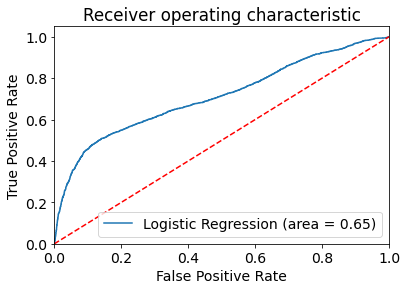

In [35]:
print(classification_report(y_test, y_pred))
roc_curve_data(y_test, X_test, clf, 'Logistic Regression')

### v3: Logistic Regression with SMOTE

In [36]:
sm = SMOTE(random_state=0)
columns = X_train.columns
sm_data_X,sm_data_y = sm.fit_sample(X_train, y_train)

sm_data_X = pd.DataFrame(data = sm_data_X,columns = columns)
sm_data_y= pd.DataFrame(data = sm_data_y,columns = ['default_payment_next_month'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(sm_data_X))
print("Number of non defaulters in oversampled data",len(sm_data_y[sm_data_y['default_payment_next_month']==0]))
print("Number of defaulters",len(sm_data_y[sm_data_y['default_payment_next_month']==1]))
print("Proportion of non defaulters in oversampled data is ",len(sm_data_y[sm_data_y['default_payment_next_month']==0])/len(sm_data_X))
print("Proportion of defaulters in oversampled data is ",len(sm_data_y[sm_data_y['default_payment_next_month']==1])/len(sm_data_X))


length of oversampled data is  32202
Number of non defaulters in oversampled data 16101
Number of defaulters 16101
Proportion of non defaulters in oversampled data is  0.5
Proportion of defaulters in oversampled data is  0.5


In [37]:
data_final_vars=data_final.columns.values.tolist()
y=['default_payment_next_month']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 26)
rfe = rfe.fit(sm_data_X, sm_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Accuracy of logistic regression classifier on test set: 0.59
[[3876 2990]
 [ 612 1392]]
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      6866
           1       0.32      0.69      0.44      2004

    accuracy                           0.59      8870
   macro avg       0.59      0.63      0.56      8870
weighted avg       0.74      0.59      0.63      8870



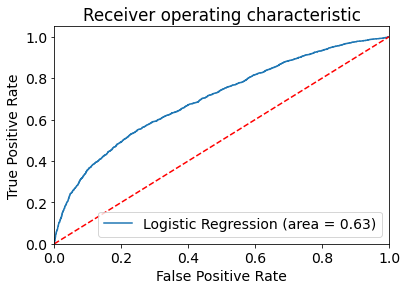

In [38]:
logreg.fit(sm_data_X,sm_data_y)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))
roc_curve_data(y_test, X_test, logreg, 'Logistic Regression')

### v4: Random Forest

0.8155682257441051


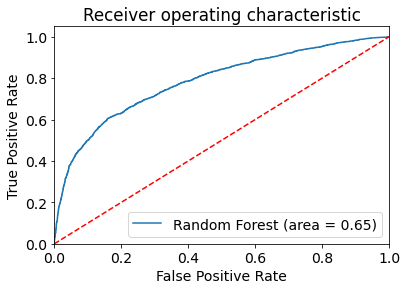

In [39]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
print(classifier_rf.oob_score_)

roc_curve_data(y_test, X_test, classifier_rf, 'Random Forest')

### v5: Random Forest with hyperparameter tuning

In [40]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,15,20,25,26]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [41]:
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.7min finished


0.818225744105141


In [42]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=26,
                       n_jobs=-1, random_state=42)

In [43]:
print(rf_best.feature_importances_)
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

#SHAP can also be used to find important feature

[0.03499797 0.02532841 0.2696195  0.12256687 0.06393434 0.03694008
 0.04342986 0.02155917 0.03677063 0.03070084 0.02926275 0.02569023
 0.02418202 0.02373394 0.03820006 0.03914048 0.0337842  0.02945349
 0.02120169 0.02330598 0.00455879 0.00308035 0.00202018 0.00616679
 0.00554916 0.00482221]


,Varname,Imp
2,pay_0,0.269619
3,pay_2,0.122567
4,pay_3,0.063934
6,pay_5,0.043430
15,pay_amt2,0.039140
14,pay_amt1,0.038200
5,pay_4,0.036940
8,bill_amt1,0.036771
0,limit_bal,0.034998
16,pay_amt3,0.033784


0.8147468109779668


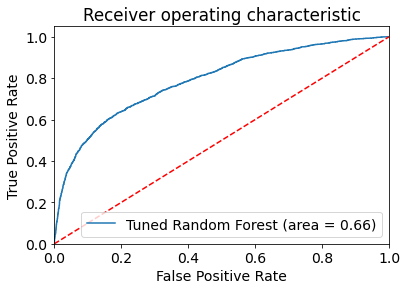

In [44]:
#with parameters obtained from grid search
from sklearn.ensemble import RandomForestClassifier
classifier_rf_best = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,
                                       n_estimators=26, oob_score=True, min_samples_leaf=20)
classifier_rf_best.fit(X_train, y_train)
print(classifier_rf_best.oob_score_)

roc_curve_data(y_test, X_test, classifier_rf_best, 'Tuned Random Forest')


## Extra

### Logistic regressio with weights

In [ ]:
w = {0:25, 1:75}

logreg = LogisticRegression(solver='liblinear', class_weight = w)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Use grid search to find optimal weight

In [ ]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [ ]:
# define model
lg3 = LogisticRegression(solver='liblinear',random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=None, n_jobs=-1, refit=True)
grid.fit(X_train, y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

### train/test size selection

In [ ]:
#selecting test and train size

for s in range(65, 85, 5):
    train_size = s/100.0
    size = int(len(data_final)*train_size)
    data_final_train = data_final.iloc[:size]
    data_final_test = data_final.iloc[size:]

    X_train = data_final_train.loc[:, ~data_final_train.columns.isin(['default_payment_next_month'])]
    y_train = data_final_train[['default_payment_next_month']]

    X_test = data_final_test.loc[:, ~data_final_test.columns.isin(['default_payment_next_month'])]
    y_test = data_final_test[['default_payment_next_month']]
    
    pipe = Pipeline([('clf', LogisticRegression(solver='liblinear', class_weight = 'balanced'))])
     # The pipeline can be used as any other estimator
    # and avoids leaking the test set into the train set
    pipe.fit(X_train, y_train.values.ravel())
    pipe.score(X_test, y_test) #r2 score for regression
    
    print("%.2f: %.3f" %(train_size, pipe.score(X_test, y_test)))


In [ ]:
pipeline = Pipeline([
    ('clf', LogisticRegression(solver='liblinear')) #step1 - classifier
])
pipeline.steps

#Seperate train and test data_final
X_train, X_test, y_train, y_test = train_test_split(data_final.iloc[:,:-1].values,
                                                   data_final['default_payment_next_month'],
                                                   test_size = 0.25,
                                                   random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

scores = cross_validate(pipeline, X_train, y_train)
print(scores)

print(scores['test_score'].mean())

In [ ]:
#https://github.com/namitasaxena027/namita_defaults_class.git